<a href="https://colab.research.google.com/github/MyriadSpace/Concepts_and_Apps_of_Deep_Learning/blob/main/Gradient/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

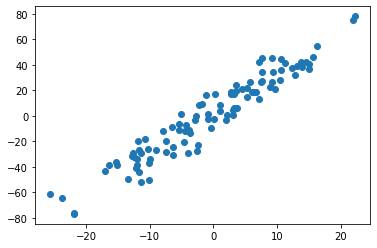

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
# dataset generation
data = np.zeros((100,2))
 
for i in range(len(data)):
  data[i][0] = 10*np.random.randn(1)
  data[i][1] = 3*data[i,0] + 2 + 10*np.random.randn(1)
 
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= 19118.645893513385 w= 16.406739930085163 b= 19.98268788008331
iteration: 1000 loss= 90.45269158639233 w= 3.062859021988092 b= 4.660289618384063
iteration: 2000 loss= 84.69338884322224 w= 3.0493358844563168 b= 2.5633473727262004
iteration: 3000 loss= 84.58646145715156 w= 3.047493259343056 b= 2.2776238537700353
iteration: 4000 loss= 84.58447624012064 w= 3.0472421883693235 b= 2.238691961652483
iteration: 5000 loss= 84.58443938252218 w= 3.047207978136652 b= 2.23338721029918
iteration: 6000 loss= 84.58443869822291 w= 3.0472033167454837 b= 2.232664399631891
iteration: 7000 loss= 84.58443868551822 w= 3.047202681597287 b= 2.2325659114604464
iteration: 8000 loss= 84.58443868528231 w= 3.0472025950537596 b= 2.2325524917360955
iteration: 9000 loss= 84.58443868527795 w= 3.047202583261579 b= 2.232550663201772
iteration: 10000 loss= 84.58443868527787 w= 3.0472025816548096 b= 2.232550414050775


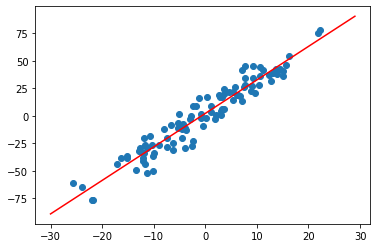

In [6]:
# y = wx + b 선형회귀식 구하기
# 학습변수별 직접 기울기를 구하고 경사하강법적용하기
# error = true - pred
# MSE loss = (true - pred)**2
def loss_function (w,b):
  return sum((y-w*x-b)**2 for x, y in data)/len(data)
 
# 학습변수 w에 대한 기울기: dL/dw  
def w_grad_loss(w,b):
  return sum(2*(y-w*x-b)*(-x) for x,y in data )/len(data)

# 학습변수 b에 대한 기울기: dL/db  
def b_grad_loss(w,b):
  return sum(2*(y-w*x-b)*(-1) for x,y in data )/len(data)
 
# 각 학습변수 초기화
w = 20.00001
b = 20.00001
 
# 학습률 정의
lr= 0.001 
 
# 10001번 반복하면서 학습 
for i in range(10000+1):
  
  # w,b 경사하강법 
  w = w - lr*w_grad_loss(w,b)
  b = b - lr*b_grad_loss(w,b)

  # 1000회 반복마다 손실값 및 w, b 출력  
  if i%1000 == 0:
    print('iteration:', i, 'loss=', loss_function(w,b), 'w=', w, 'b=', b)
 
# 결과 출력
x_coor = []
y_coor = []

iter=0
for i in range(-30,30,1):
  x_coor.append (i)
  y_coor.append (w*x_coor[iter] + b)
  iter+=1
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= 19118.34430282486 w= 16.406633237064195 b= 19.98268673461305
iteration: 1000 loss= 90.44917745777809 w= 3.0623543694834687 b= 4.659560305203026
iteration: 2000 loss= 84.69286813310687 w= 3.0488305903431687 b= 2.5625185696213713
iteration: 3000 loss= 84.58641294202761 w= 3.0469878778061847 b= 2.27678149444419
iteration: 4000 loss= 84.58449325914225 w= 3.046736794920246 b= 2.237847755194462
iteration: 5000 loss= 84.5844653532152 w= 3.0467025830644694 b= 2.232542752155151
iteration: 6000 loss= 84.5844658890574 w= 3.0466979214521324 b= 2.2318199071945735
iteration: 7000 loss= 84.58446604261337 w= 3.0466972862737514 b= 2.231721414350357
iteration: 8000 loss= 84.58446606503189 w= 3.0466971997262213 b= 2.2317079939891578
iteration: 9000 loss= 84.58446606811434 w= 3.0466971879334714 b= 2.2317061653680916
iteration: 10000 loss= 84.58446606853485 w= 3.0466971863266075 b= 2.2317059162049127


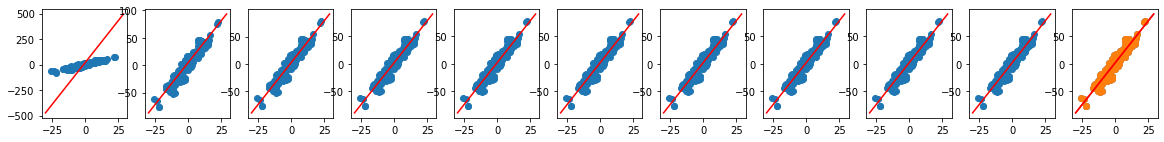

In [7]:
# y = wx + b 선형회귀식 구하기
# 유한차분법 함수를 정의해서 기울기르 구하고 경사하강법 적용하기
# MSE 손실함수 = (true - pred)**2
# len(data)는 전체 학습데이터의 개수로 평균값 계산에 사용
def loss_function (w,b):
  return sum((y-w*x-b)**2 for x, y in data)/len(data)

# 유한차분법을 이용한 기울기 계산 
def grad_loss(w,b, w_h, b_h):
  return  (loss_function(w+w_h,b+b_h) - loss_function(w,b))/h 

# 학습변수 초기화  
w = 20.00001
b = 20.00001

# 학습률 정의
lr= 0.001 

# 미분계수 정의
h = 0.001
 
plt.figure(figsize=(20,2))
plt_cnt=1

# 10001번 반복하면서 학습
for i in range(10000+1):
  # w,b 경사하강법
  w = w - lr*grad_loss(w, b, h, 0)
  b = b - lr*grad_loss(w, b, 0, h)
  
  # 1000회 반복마다 손실값 및 w, b 출력
  if i%1000 == 0:
    print('iteration:', i, 'loss=', loss_function(w,b), 'w=', w, 'b=', b)
    iter=0

    # 선형회귀 수렴도 관찰
    x_coor = []
    y_coor = []
    plt.subplot(1,11,plt_cnt)
    for j in range(-30,30,1):
      x_coor.append (j)
      y_coor.append (w*x_coor[iter] + b)
      iter+=1 
    plt.plot(x_coor, y_coor, 'r')
    plt.scatter(data[:,0], data[:,1])
    plt_cnt+=1

# 결과 출력
x_coor = []
y_coor = []
iter=0
for i in range(-30,30,1):
  x_coor.append (i)
  y_coor.append (w*x_coor[iter] + b)
  iter+=1 
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1], cmap='b')
plt.show()


iteration:  0 loss= tf.Tensor(19120.953, shape=(), dtype=float32) w= 16.40752 b= 19.988575
iteration:  1000 loss= tf.Tensor(90.46881, shape=(), dtype=float32) w= 3.0628805 b= 4.6636195
iteration:  2000 loss= tf.Tensor(84.693695, shape=(), dtype=float32) w= 3.049339 b= 2.5638075
iteration:  3000 loss= tf.Tensor(84.58647, shape=(), dtype=float32) w= 3.0474937 b= 2.2776895
iteration:  4000 loss= tf.Tensor(84.58447, shape=(), dtype=float32) w= 3.0472424 b= 2.2387
iteration:  5000 loss= tf.Tensor(84.58444, shape=(), dtype=float32) w= 3.0472083 b= 2.2333896
iteration:  6000 loss= tf.Tensor(84.58444, shape=(), dtype=float32) w= 3.0472038 b= 2.2326736
iteration:  7000 loss= tf.Tensor(84.58444, shape=(), dtype=float32) w= 3.0472033 b= 2.2326105
iteration:  8000 loss= tf.Tensor(84.58444, shape=(), dtype=float32) w= 3.0472033 b= 2.2326105
iteration:  9000 loss= tf.Tensor(84.58444, shape=(), dtype=float32) w= 3.0472033 b= 2.2326105
iteration:  10000 loss= tf.Tensor(84.58444, shape=(), dtype=float3

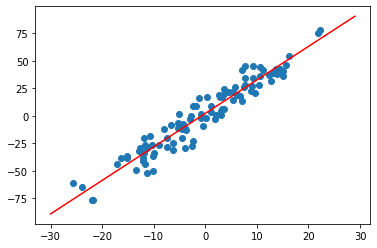

In [8]:
# y = wx + b 선형회귀식 구하기
# 텐서플로우를 이용한 회귀식 문제
import tensorflow as tf
 
# w,b 변수 설정 및 초기화
w = tf.Variable(initial_value=20.001)
b = tf.Variable(initial_value=20.001)
 
x = data[:,0]
y = data[:,1]
 
# 손실함수 정의: MSE
def loss_function(x,y):
  pred = w*x+b
  return tf.reduce_mean(tf.math.square(y - pred))
 
# 최적화 함수 정의: 기본적인 SGD 선정
# 학습률 = 0.001로 정의
optimizer=tf.optimizers.SGD(learning_rate=0.001)
 
# 학습모델 정의
def train():
  # tf.GradientTape은 기울기를 기록하는 메소드임
  with tf.GradientTape() as g:
    loss = loss_function(x,y)
# tensorflow에 내장된 유한차분법 함수를 사용하여 기울기 계산    
  gradients = g.gradient(loss, [w,b])

# SGD를 이용하여 각 학습변수 엡데이트  
  optimizer.apply_gradients(zip(gradients, [w,b]))
 
for i in range(10000+1):
  x = data[:,0]
  y = data[:,1]
# 학습
  train()
  # 1000회 반복마다 손실값 및 w, b 출력
  if i%1000 == 0:
    loss = loss_function(x,y)
    print('iteration: ', i, 'loss=', loss, 'w=', w.numpy(), 'b=', b.numpy())
 
# 결과 출력
x_coor = []
y_coor = []
iter=0
w = w.numpy()
b = b.numpy()
for i in range(-30,30):
  x_coor.append (i)
  y_coor.append (w*x_coor[iter] + b) 
  iter+=1
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= tensor(749.4944, grad_fn=<MseLossBackward>) param= tensor([[1.0830]]) tensor([0.9205])
iteration: 1000 loss= tensor(84.6157, grad_fn=<MseLossBackward>) param= tensor([[3.0461]]) tensor([2.0557])
iteration: 2000 loss= tensor(84.5850, grad_fn=<MseLossBackward>) param= tensor([[3.0470]]) tensor([2.2089])
iteration: 3000 loss= tensor(84.5845, grad_fn=<MseLossBackward>) param= tensor([[3.0472]]) tensor([2.2294])
iteration: 4000 loss= tensor(84.5844, grad_fn=<MseLossBackward>) param= tensor([[3.0472]]) tensor([2.2321])
iteration: 5000 loss= tensor(84.5844, grad_fn=<MseLossBackward>) param= tensor([[3.0472]]) tensor([2.2325])
iteration: 6000 loss= tensor(84.5844, grad_fn=<MseLossBackward>) param= tensor([[3.0472]]) tensor([2.2325])
iteration: 7000 loss= tensor(84.5844, grad_fn=<MseLossBackward>) param= tensor([[3.0472]]) tensor([2.2325])
iteration: 8000 loss= tensor(84.5844, grad_fn=<MseLossBackward>) param= tensor([[3.0472]]) tensor([2.2325])
iteration: 9000 loss= tensor(8

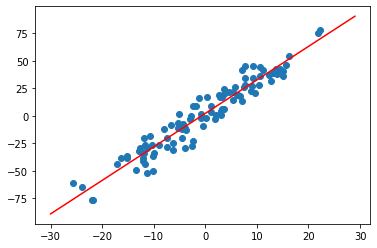

In [9]:
# y = wx + b 선형회귀식 구하기
# 파이토치를 이용한 회귀식 문제
import torch
import torch.nn as nn
import torch.nn.functional as F
 
# 학습모델 정의
class Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
# 단변수 (univariate) 선형 회귀이므로 input_dim=1 for x, output_dim=1 for y        
        self.linear = nn.Linear(1, 1) 
 
# 순전파 함수 (여기에서는 입력층 각 층에 노드가 한개인 SLP 구조)
    def forward(self, x):
        return self.linear(x)
 
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)
 
# 파이토치 포맷으로 변환
in_x = torch.FloatTensor(x)
in_y = torch.FloatTensor(y)
 
# 회귀 모델 선언
model = Linear_Regression()
# 최적화 함수: 기본적인 SGD를 선정하고 Nesterov 모멘텀 사용. lr은 학습률
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.01, nesterov=True) 
weight = []
 
for i in range(10000+1):
  pred = model(in_x)
  loss = F.mse_loss(pred, in_y)
  # 최적화 함수 초기화
  optimizer.zero_grad()
  # torch에 내장된 유한차분법 함수를 사용하여 기울기 계산
  loss.backward()
  # 학습변수 업데이트
  optimizer.step()
 
  # 1000회 반복마다 손실값 및 w, b 출력
  if i%1000 == 0:
    for param in model.parameters():
      weight.append (param.data)
    print('iteration:', i, 'loss=', loss, 'param=', weight[0], weight[1]) 
 
# 결과 출력
x_coor = []
y_coor = []
a = weight[0]
c = weight[1]
iter=0
for i in range(-30,30):
  x_coor.append (i)
  y_coor.append (a*x_coor[iter] + c)
  iter+=1 
 
plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

In [10]:
import torch
print(torch.__version__)

1.8.1+cu101


In [11]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [12]:
from sklearn.linear_model import LinearRegression
 
X = data[:,0].reshape(-1, 1)
Y = data[:,1]
 
model = LinearRegression().fit(X, Y)
print('W=', model.coef_, 'b=',model.intercept_)

W= [3.04720258] b= 2.2325503747466837
